## Full disclaimer, 
#### I ripped tf outta this MIT lecture [here](https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/moneyball-the-power-of-sports-analytics/) where they did it in R.  But I made it cooler and better. It's my remix of their info.

# ISBE 
* I - Inspect
* S - Select
* B - Build
* E - Evaluate 

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot




In [2]:
# https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/moneyball-the-power-of-sports-analytics/video-2-making-it-to-the-playoffs/
def load_baseball_data(from_year=2002):
    df = pd.read_csv('data/baseball.csv')

    # Moneyball happened in 2002. 
    # So lets travel there and remove all data after then. 
    if from_year:
        c1 = df['Year'] < from_year 
        df = df[c1]
        df = df.reset_index(drop=True)
    df['runs_diff'] = df['RS'] - df['RA']
    return(df)


In [6]:
df = load_baseball_data()
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,runs_diff
0,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
1,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
2,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
3,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
4,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


#### Data Dictionary
```
* Team: Name of Team
* League: Name of League
* Year: Year of Season
* RS: Runs Scored
* RA: Runs Allowed
* W: Number of Wins
* OBP: On Base Percentage
* SLG: Slugging Percentage
* BA: Batting Average
* Playoffs: Did the team make playoffs.  1==yes
* RankSeason: idk
* RankPlayoffs: idk
* G: Number or games played
* OOBP: Opponent On Base Percentage 
* OSLG: Opponent Slugging Percentage
* runs_diff: Runs Scored - Runs Allowed
```

In [8]:
print('\n', '#'*79)
###############################################################################
print('CHECKING SHAPE AND SIZE:  df.shape', df.shape)
print('\n', '#'*79)

###############################################################################
print( "CHEKCING NULLS", "print(df.isnull().sum())")
print(df.isnull().sum())
print('\n', '#'*79)

###############################################################################
print("CHECKING DUPES, df.duplicated().sum()")
print(df.duplicated().sum())    





 ###############################################################################
CHECKING SHAPE AND SIZE:  df.shape (902, 16)

 ###############################################################################
CHEKCING NULLS print(df.isnull().sum())
Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            812
OSLG            812
runs_diff         0
dtype: int64

 ###############################################################################
CHECKING DUPES, df.duplicated().sum()
0


# Making the playoffs

### The Oakland A's, Paul DePodesta, estimated how many games it would take to make the playoffs:   _95 Wins_
---
So homeboy Peter something, gut feeling predicted you need to win 95 games to make the playoffs.  Lets inspect this hypothesis

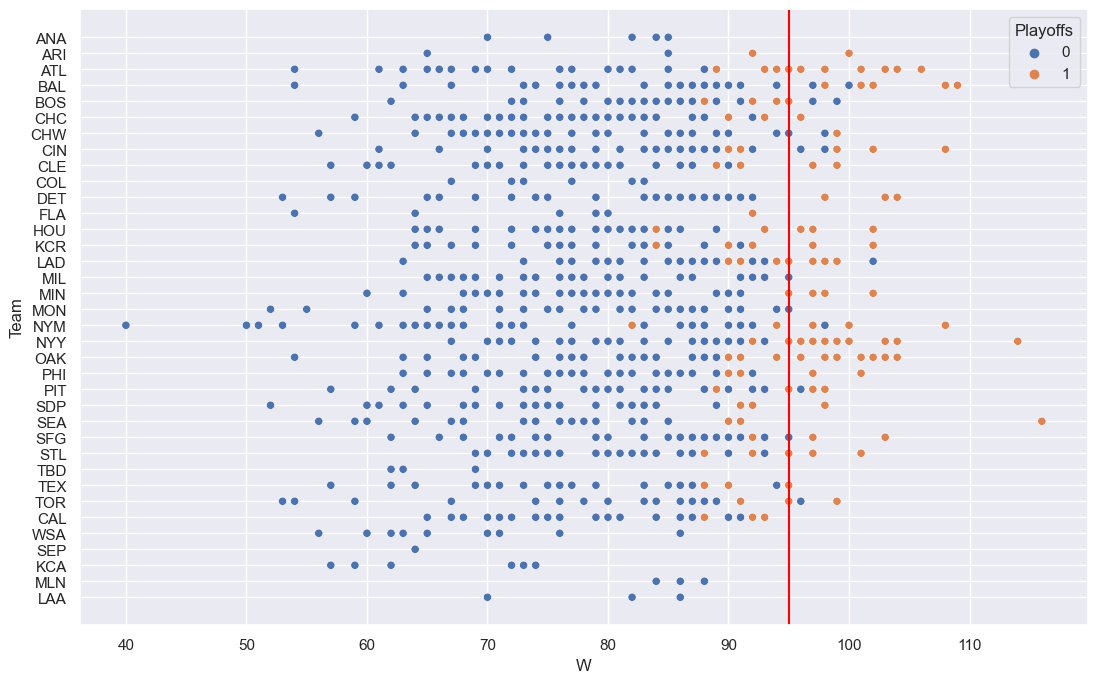

In [9]:
sns.set()
plt.figure(figsize=(13, 8))
ax = sns.scatterplot(df, x='W', y='Team', hue='Playoffs')
ax.axvline(x=95, color='red')

# Okay, how do you win.  Enter hypothesis here.  

# Score more than is scored on you.

<Axes: xlabel='runs_diff', ylabel='W'>

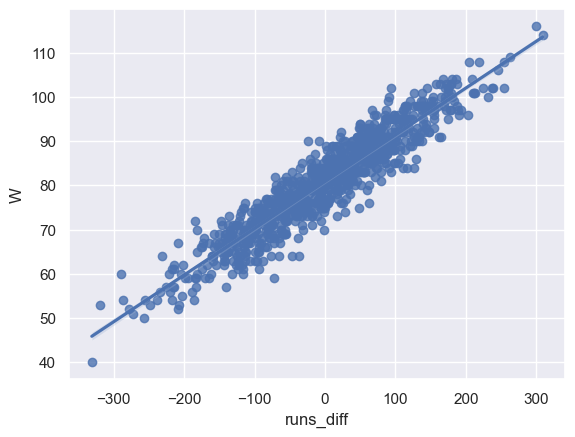

In [9]:
df['runs_diff'] = df['RS'] - df['RA']
sns.regplot(df, x='runs_diff', y='W')


### They calculated they needed to score 135 more runs than they allow to win 95 games.  


In [51]:
import statsmodels.api as sm
independent_variables = 'runs_diff'
dependent_variable = 'W'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)

model_wins = sm.OLS(y, X).fit()
y_pred = model_wins.predict(X) 

results = model_wins.summary()
print(results)

model_wins_root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', model_wins_root_mean_squared_error)
try:
    print( 'RMSEs Percentage off average:', ((model_wins_root_mean_squared_error / y.mean())*100).round(2))
except:
    pass


                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:27:18   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8814      0.131    616.675      0.0

* Average Wins:  80.88 
* RMSE:  3.93 
* % off average by: %4.86


### Generated by ChatGPT:
    Average Error: On average, the model's predictions are about 3.93 wins away from the actual number of wins. This means, if your model predicted a team would win 85 games, you can expect the actual number of wins to be generally between 81.07 and 88.93.

# ChatGPT Suggestion: 
```Baseline Comparison: It can be helpful to compare the RMSE of the model to a naive or baseline prediction. For instance, if you always predicted the mean (80 wins) regardless of the input features, what would the RMSE be? If your model's RMSE is substantially lower than this baseline RMSE, it indicates that your model is capturing meaningful patterns in the data.```

In [12]:
# Making a new y_pred that every row is just the average wins of our data. 
naive_y_preds = [y.mean()]*len(y)
print(naive_y_preds[:5])

# finding the root mean squared of just our naive baseline 'model'
root_mean_squared_error = rmse(y, naive_y_preds)

# print that 
root_mean_squared_error


[80.88137472283813, 80.88137472283813, 80.88137472283813, 80.88137472283813, 80.88137472283813]


11.397100960562694

11.39 is much worse than our 3.93 so we can have some intuition that our model is better than just guessing the average. 

## Finding out how many runs diff we need to make 95 wins

In [13]:
coef_y_int = model_wins.params['const']
coef_runs_diff = model_wins.params['runs_diff']

print(coef_y_int, coef_runs_diff)

WINS = 95

# When is runs_diff make WINS >= 95
# coef_y_int + coef_runs_diff*??? >= 95
min_runs_diff = (WINS - coef_y_int) / coef_runs_diff
min_runs_diff


80.88137472283807 0.10576562244931814


133.48973844433652

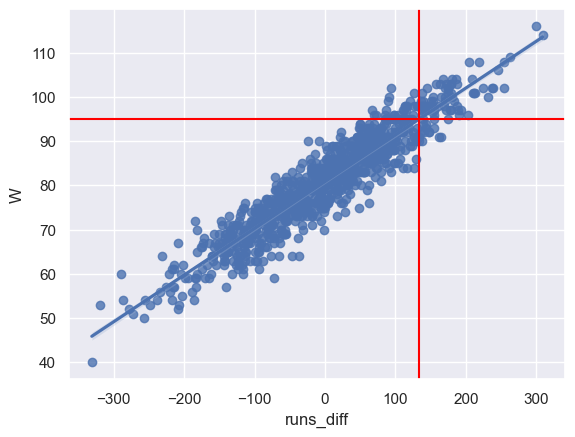

In [14]:
ax = sns.regplot(df, x='runs_diff', y='W' )
ax.axvline(x=min_runs_diff, color='red')
ax.axhline(y=WINS, color='red')

# We need to score 133.5 more runs than we allow to win 95 games to make the playoffs.  
### Okay.... now what?

# Okay, how do we increase runs_diff aka score more runs than we allow?

Everyone (in baseball) used to focus on Batting Average (BA) as the most important thing (or feature) when it came to winning.  

The Oakland A's thought different.  They used machine learning to find which were things (or features) acutally the most important when it came to winning. 


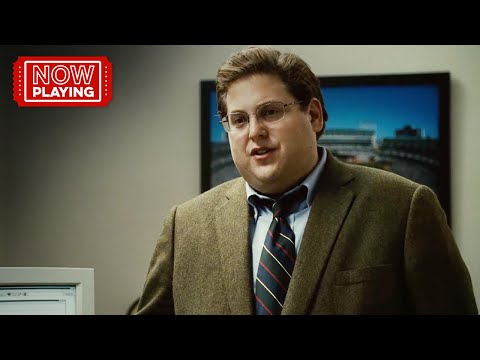

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('unGSY5l76YQ', 800,500)

In [ ]:
# from IPython.display import YouTubeVideo
# YouTubeVideo('3MjxoaynCmk', 800,500)

# Find which varibles are linearly related to runs scored `RS`

So now, `RS` is our `y` dependent variable.  We want to find which variables are linearlly related to it.  We can do that visually. 

['Year', 'RS', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs', 'RankSeason', 'RankPlayoffs', 'G', 'OOBP', 'OSLG', 'runs_diff']


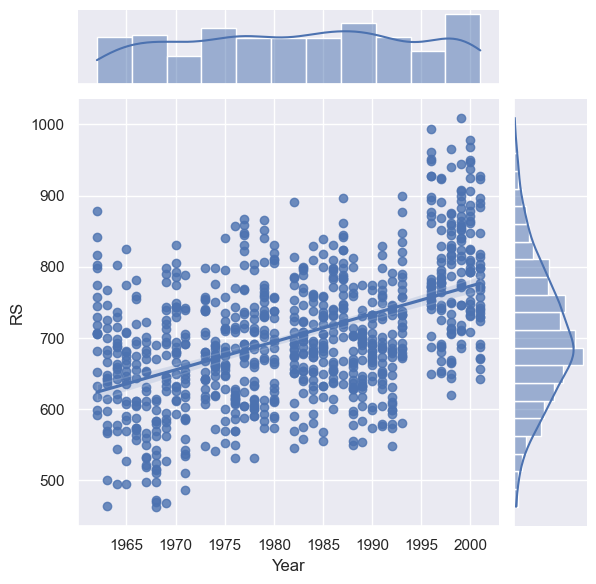

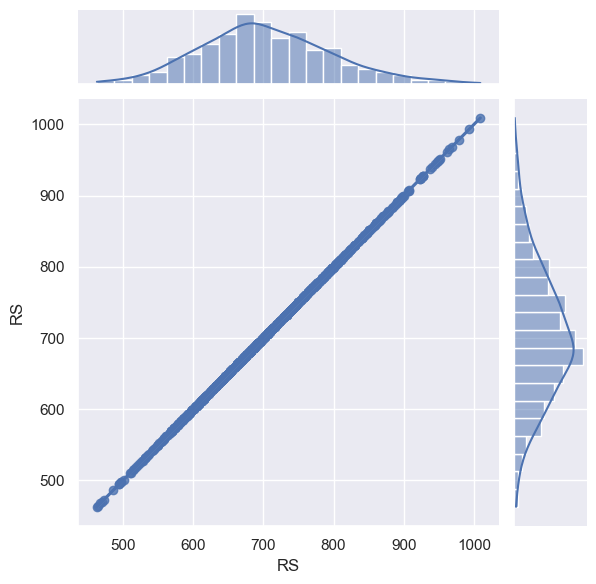

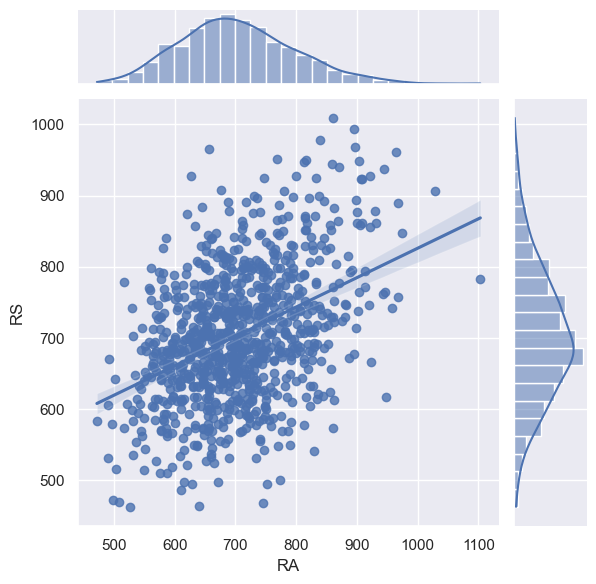

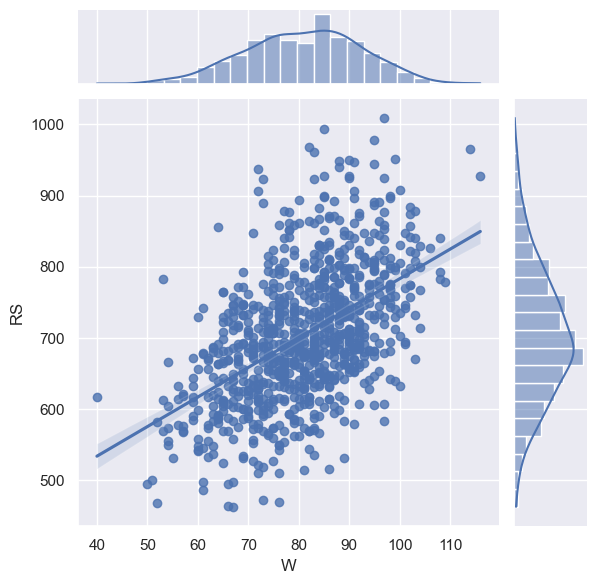

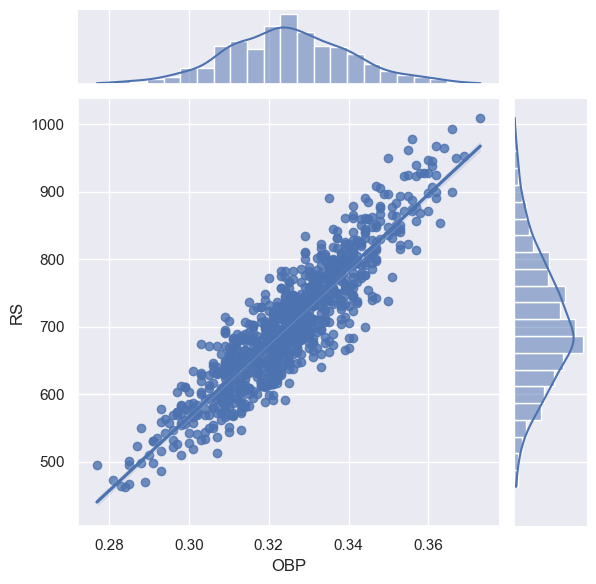

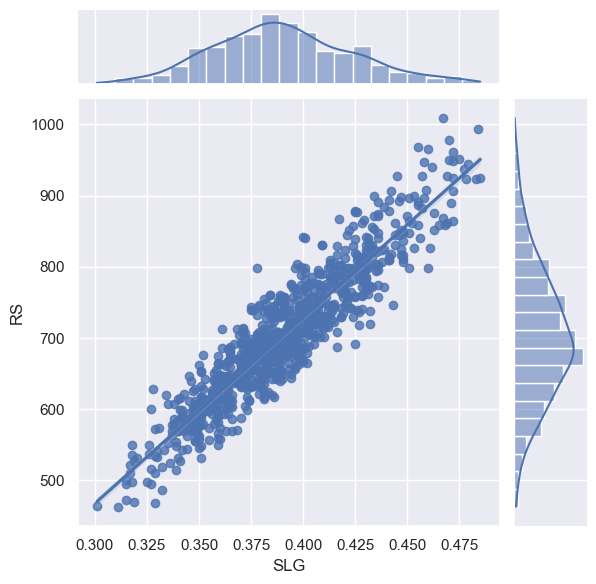

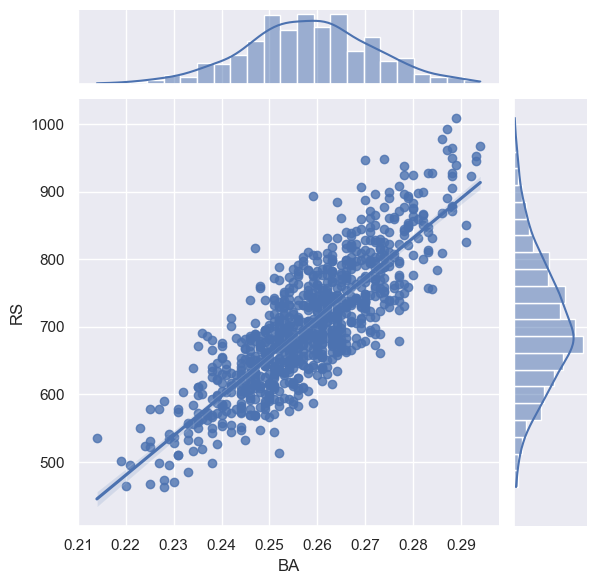

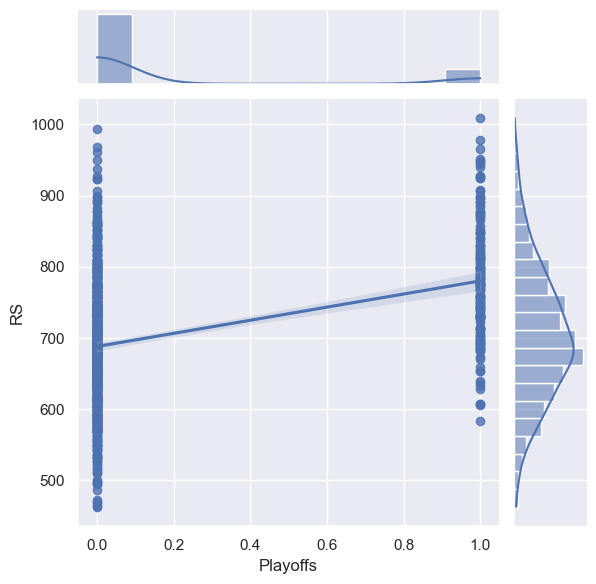

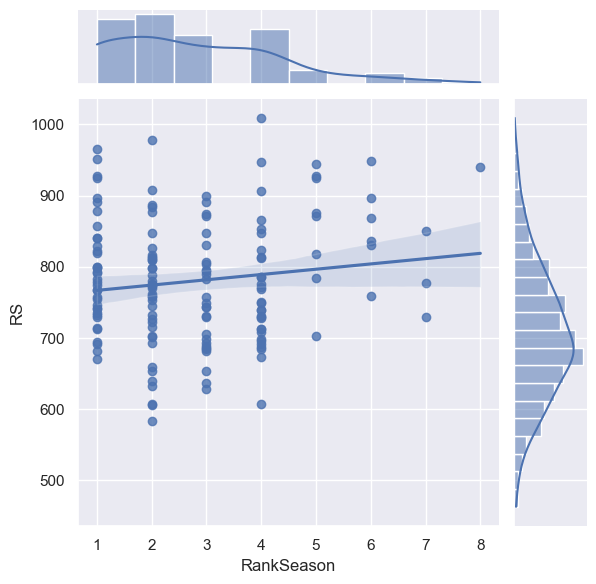

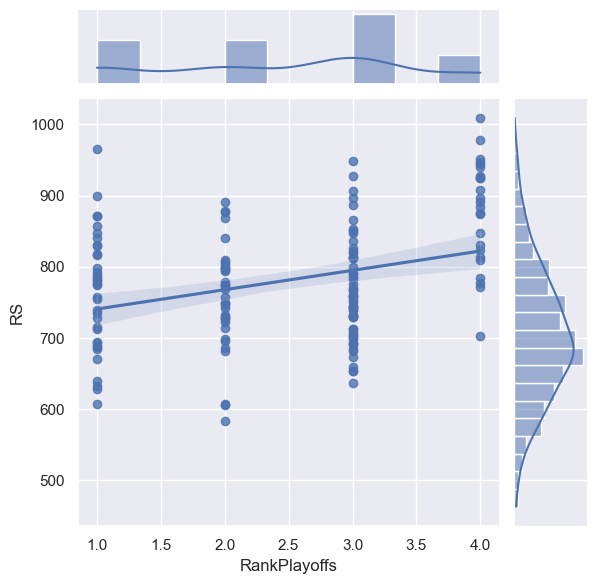

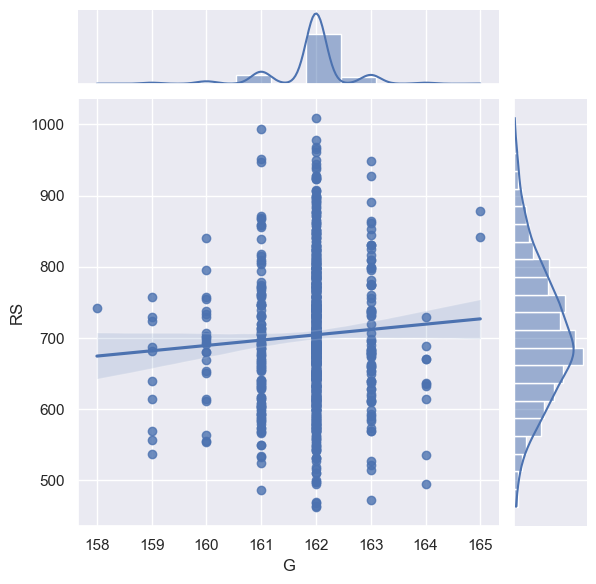

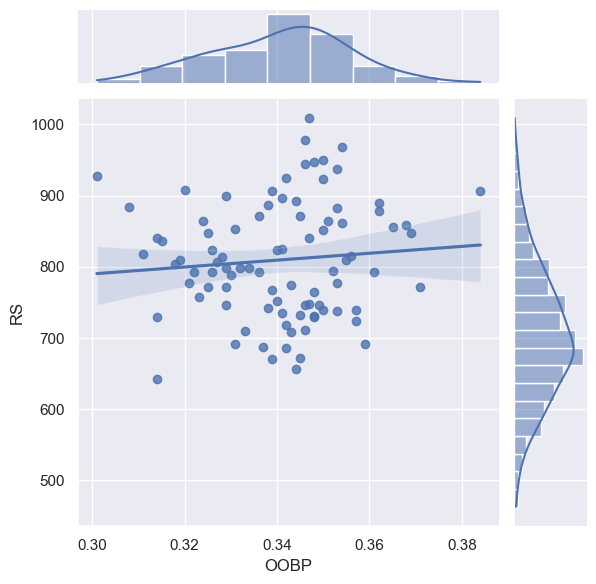

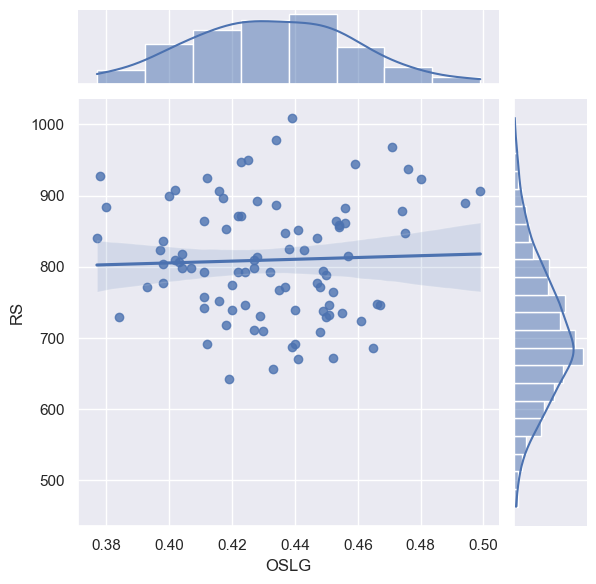

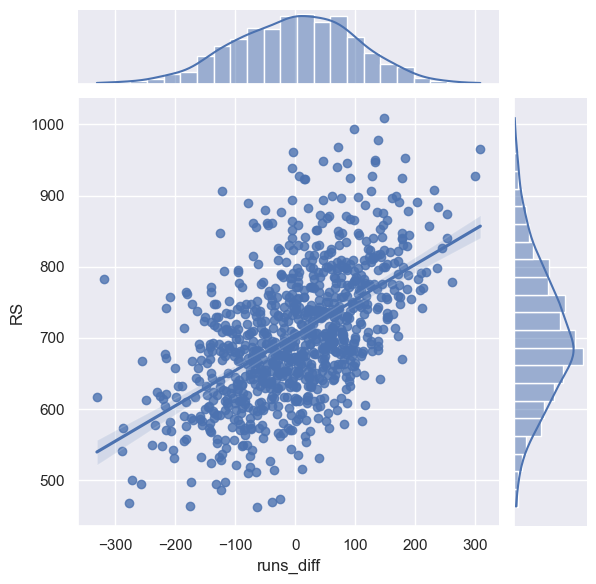

In [16]:
all_numeric_vars = list(df.select_dtypes(include='number').columns)
print(all_numeric_vars)

dependent_variable = 'RS'
for col in all_numeric_vars:
    try:
        sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");
    except:
        print('Could not plot variable %s' % col)

    #sns.relplot(data = df, x=col, y=target, height=5, aspect=1)

In [26]:
df[all_numeric_vars].corr().round(2)

/var/folders/4w/4f8yp1td7l7_p77z3vdgy0dh0000gn/T/ipykernel_30405/3811783169.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[all_numeric_vars].corr().round(2)


,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,runs_diff
Year,1.00,0.49,0.48,0.00,0.47,0.52,0.44,0.11,0.42,0.43,-0.03,-0.34,-0.12,-0.00
RS,0.49,1.00,0.42,0.51,0.90,0.93,0.83,0.37,0.14,0.32,0.06,0.09,0.04,0.54
RA,0.48,0.42,1.00,-0.51,0.37,0.46,0.35,-0.24,0.54,0.38,-0.04,0.91,0.90,-0.54
W,0.00,0.51,-0.51,1.00,0.47,0.41,0.42,0.59,-0.75,-0.24,0.11,-0.63,-0.65,0.94
OBP,0.47,0.90,0.37,0.47,1.00,0.81,0.85,0.35,0.15,0.30,-0.00,0.05,-0.01,0.49
SLG,0.52,0.93,0.46,0.41,0.81,1.00,0.81,0.30,0.22,0.34,0.01,0.10,0.08,0.43
BA,0.44,0.83,0.35,0.42,0.85,0.81,1.00,0.28,0.16,0.23,-0.00,0.22,0.23,0.44
Playoffs,0.11,0.37,-0.24,0.59,0.35,0.30,0.28,1.00,NaN,NaN,0.01,-0.50,-0.51,0.57
RankSeason,0.42,0.14,0.54,-0.75,0.15,0.22,0.16,NaN,1.00,0.35,0.05,0.14,0.24,-0.57
RankPlayoffs,0.43,0.32,0.38,-0.24,0.30,0.34,0.23,NaN,0.35,1.00,0.01,0.30,0.32,-0.08


# The kitchen Sink model:  DO EM ALL


In [17]:
all_numeric_vars = list(df.select_dtypes(include='number').columns)
all_numeric_vars.remove('RS')
all_numeric_vars.remove('OOBP')
all_numeric_vars.remove('OSLG')
all_numeric_vars.remove('RankSeason')
all_numeric_vars.remove('RankPlayoffs')

independent_variables = all_numeric_vars.copy()

print(independent_variables)

dependent_variable = 'RS'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)
X
model_runs_scored = sm.OLS(y, X).fit()

print(model_runs_scored.summary())


y_pred = model_runs_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error.round(3))
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
    pass





['Year', 'RA', 'W', 'OBP', 'SLG', 'BA', 'Playoffs', 'G', 'runs_diff']
                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.446e+28
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:16:47   Log-Likelihood:                 21800.
No. Observations:                 902   AIC:                        -4.358e+04
Df Residuals:                     892   BIC:                        -4.353e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

# Selecting Features

In [79]:
independent_variables = ['OBP', 'SLG', 'BA', ]

print(independent_variables)

dependent_variable = 'RS'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)
X
model_runs_scored = sm.OLS(y, X).fit()

print(model_runs_scored.summary())


y_pred = model_runs_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error.round(3))
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
    pass





['OBP', 'SLG', 'BA']
                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3989.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:18:29   Log-Likelihood:                -4170.2
No. Observations:                 902   AIC:                             8348.
Df Residuals:                     898   BIC:                             8368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -788.4570     19.69

In [19]:
independent_variables = ['OBP', 'SLG', 'BA']
dependent_variable = 'RS'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)

model_runs_scored = sm.OLS(y, X).fit()

print(model_runs_scored.summary())


y_pred = model_runs_scored.predict(X)

root_mean_squared_error = rmse(y, y_pred)
print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error)
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
    pass





                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3989.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:18:14   Log-Likelihood:                -4170.2
No. Observations:                 902   AIC:                             8348.
Df Residuals:                     898   BIC:                             8368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -788.4570     19.697    -40.029      0.0

# Lets remove BA and see what happens...



In [20]:
independent_variables = ['OBP', 'SLG']
dependent_variable = 'RS'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)

model_runs_scored = sm.OLS(y, X).fit()
print(model_runs_scored.summary())


print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error)
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
    pass





                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:18:31   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -804.6271     18.921    -42.526      0.0

In [21]:
# Sanity check, this should be close zero
model_runs_scored.resid.mean()

2.2507977250915953e-12

array([[<Axes: title={'center': 'OBP'}>, <Axes: title={'center': 'SLG'}>],
       [<Axes: title={'center': 'BA'}>, <Axes: >]], dtype=object)

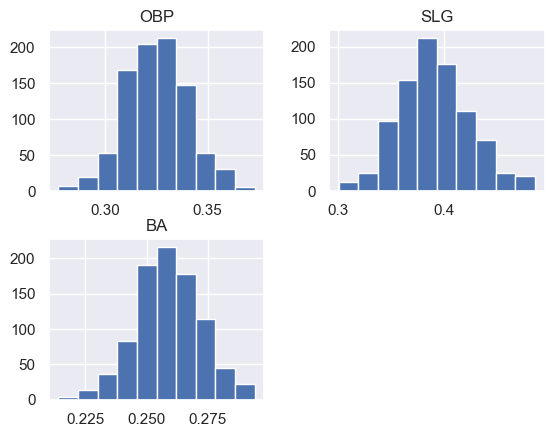

In [22]:
df[['OBP', 'SLG', 'BA']].hist()

In [23]:
df.head(1)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,runs_diff
0,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39


---
# Okay, lets see what affects RUNS ALLOWED the most.

In [24]:
df.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      748
RankPlayoffs    748
G                 0
OOBP            812
OSLG            812
runs_diff         0
dtype: int64

### Whats the error here?

In [29]:
# Make a copy of the 
independent_variables = ['OOBP', 'OSLG']
dependent_variable = 'RA'

X = df[independent_variables]
y = df[dependent_variable]

X = sm.add_constant(X)

model_allowed_scored = sm.OLS(y, X).fit()
print(model_allowed_scored.summary())


print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error)
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
    pass


## THIS IS AN ERROR I LEFT IN ON PURPOSE

MissingDataError: exog contains inf or nans

In [30]:
# There are nans in the OOBP and OSLG columns. 
# Make a copy of the dataframe and remove nans


df_defense = df[['OOBP', 'OSLG', 'RA']].copy()
df_defense = df_defense.dropna()
print(df_defense.shape)

independent_variables = ['OOBP', 'OSLG']
dependent_variable = 'RA'

X = df_defense[independent_variables]
y = df_defense[dependent_variable]

X = sm.add_constant(X)

model_allowed_scored = sm.OLS(y, X).fit()
print(model_allowed_scored.summary())


print('#'*79)
print( 'Dependent Variable %s average: ' % dependent_variable, y.mean())
print( 'RMSE:', root_mean_squared_error)
try:
    print( 'RMSEs Percentage off average:', ((root_mean_squared_error / y.mean())*100).round(2))
except:
    pass




(90, 3)
                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     425.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.16e-45
Time:                        09:21:51   Log-Likelihood:                -418.27
No. Observations:                  90   AIC:                             842.5
Df Residuals:                      87   BIC:                             850.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -837.3779     60.255    -13.897 

# Lets make projects for the okaland A's 2001 team

In [31]:
df = load_baseball_data()
df_oak = df[ df['Team'] == 'OAK' ].copy()

df_oak_2001 = df_oak[df_oak['Year']==2001].copy()

df_oak_2001['const'] = 1
df_oak_2001

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,runs_diff,const
20,OAK,AL,2001,884,645,102,0.345,0.439,0.264,1,2.0,4.0,162,0.308,0.38,239,1


In [32]:
RS_2001 = model_runs_scored.predict(df_oak_2001[['const' ,'OBP', 'SLG']])
predicted_runs_scored = RS_2001.values[0]
print('Actual runs scored for Oakland in 2001:', df_oak_2001['RS'].values[0])
print('Predicted runs scored for Oakland in 2001:', predicted_runs_scored)



Actual runs scored for Oakland in 2001: 884
Predicted runs scored for Oakland in 2001: 835.6777844184746


In [33]:
RA_2001 = model_allowed_scored.predict( df_oak_2001[['const', 'OOBP', 'OSLG']] )
predicted_runs_allowed = RA_2001.values[0]
print('Actual runs ALLOWED for Oakland in 2001:', df_oak_2001['RA'].values[0])

print('Predicted runs ALLOWED for Oakland in 2001:', predicted_runs_allowed)

Actual runs ALLOWED for Oakland in 2001: 645
Predicted runs ALLOWED for Oakland in 2001: 635.4394172160489


In [34]:
runs_diff = predicted_runs_scored - predicted_runs_allowed
runs_diff
WINS_2001 = model_wins.predict([1, runs_diff])

predicted_wins = WINS_2001[0]
print('Actual WINS for Oakland in 2001:', df_oak_2001['W'].values[0])
print('Predicted WINS for Oakland in 2001:',predicted_wins )


Actual WINS for Oakland in 2001: 102
Predicted WINS for Oakland in 2001: 102.05971026823777


In [35]:
def predict_wins(team, year):
    df = load_baseball_data(from_year=None)
    df['const']=1
    df = df[ df['Team'] == team]
    df = df[ df['Year'] == year]
    
    runs_scored = model_runs_scored.predict(df[['const' ,'OBP', 'SLG']])
    runs_allowed = model_allowed_scored.predict( df[['const', 'OOBP', 'OSLG']] )
    runs_diff = runs_scored-runs_allowed
    pred = model_wins.predict([1, runs_diff])
    return(pred)

predict_wins("NYY", 2001)
    

/Users/zacharydesario/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:1120: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  exog = np.asarray(exog)


array([349    92.23956
       dtype: float64 ], dtype=object)

# Checking our Assumptions

# Checking Assumptons
1. Linearity
2. Homoscedasticity
3. Normality of Errors
4. Multicollinearity
5. Outliers

# Lets do this for the runs scored model first. 

In [37]:
independent_variables = ['OBP', 'SLG']
dependent_variable = 'RS'

X = df[independent_variables]

y = df[dependent_variable]

X = sm.add_constant(X)

model_runs_scored = sm.OLS(y, X).fit()
#predictions = mode_runs_scored.predict(X) 
print(model_runs_scored.summary())

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:22:50   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -804.6271     18.921    -42.526      0.0

## Checking Linearity

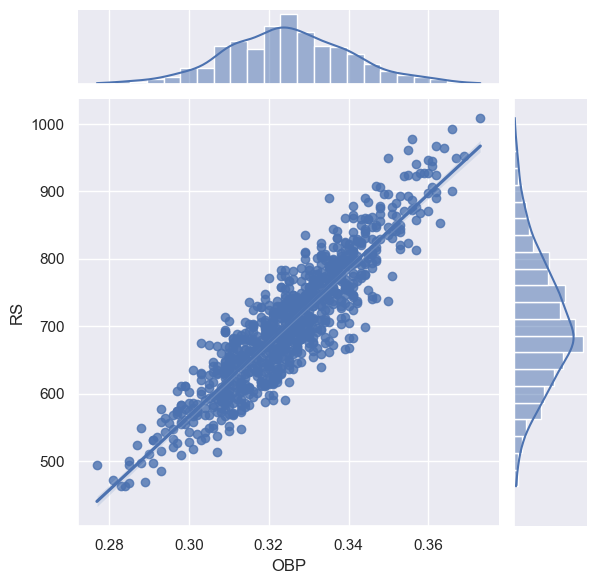

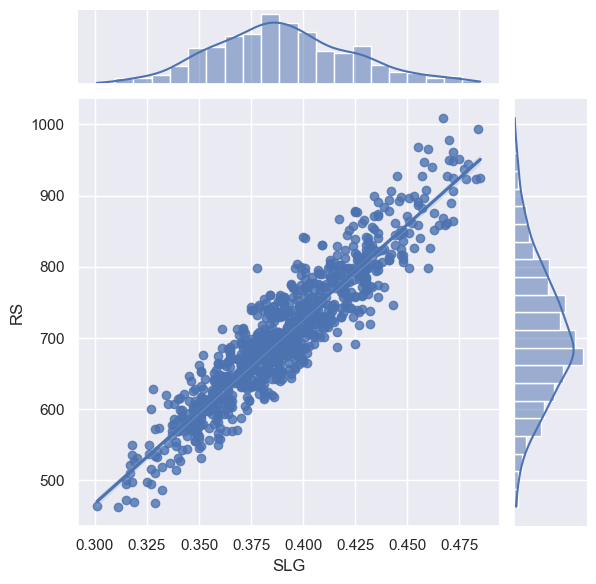

In [38]:
for col in independent_variables:
    sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");

# Checking Homoscedasticy


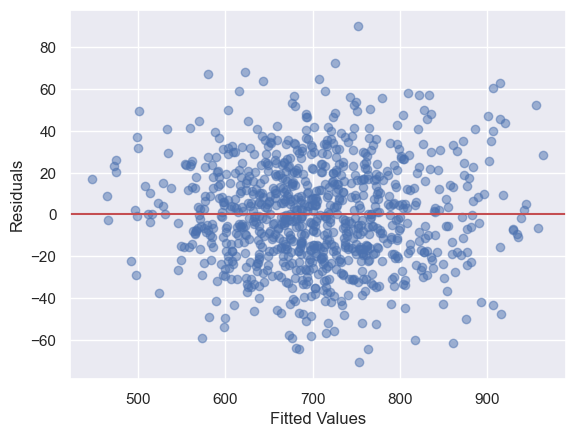

In [39]:
## Code taken / modified via tutorial below
# https://www.einblick.ai/python-code-examples/residual-plots-heteroskedasticity-test/

plt.scatter(model_runs_scored.fittedvalues, model_runs_scored.resid, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y = 0, color = 'r')
plt.show()


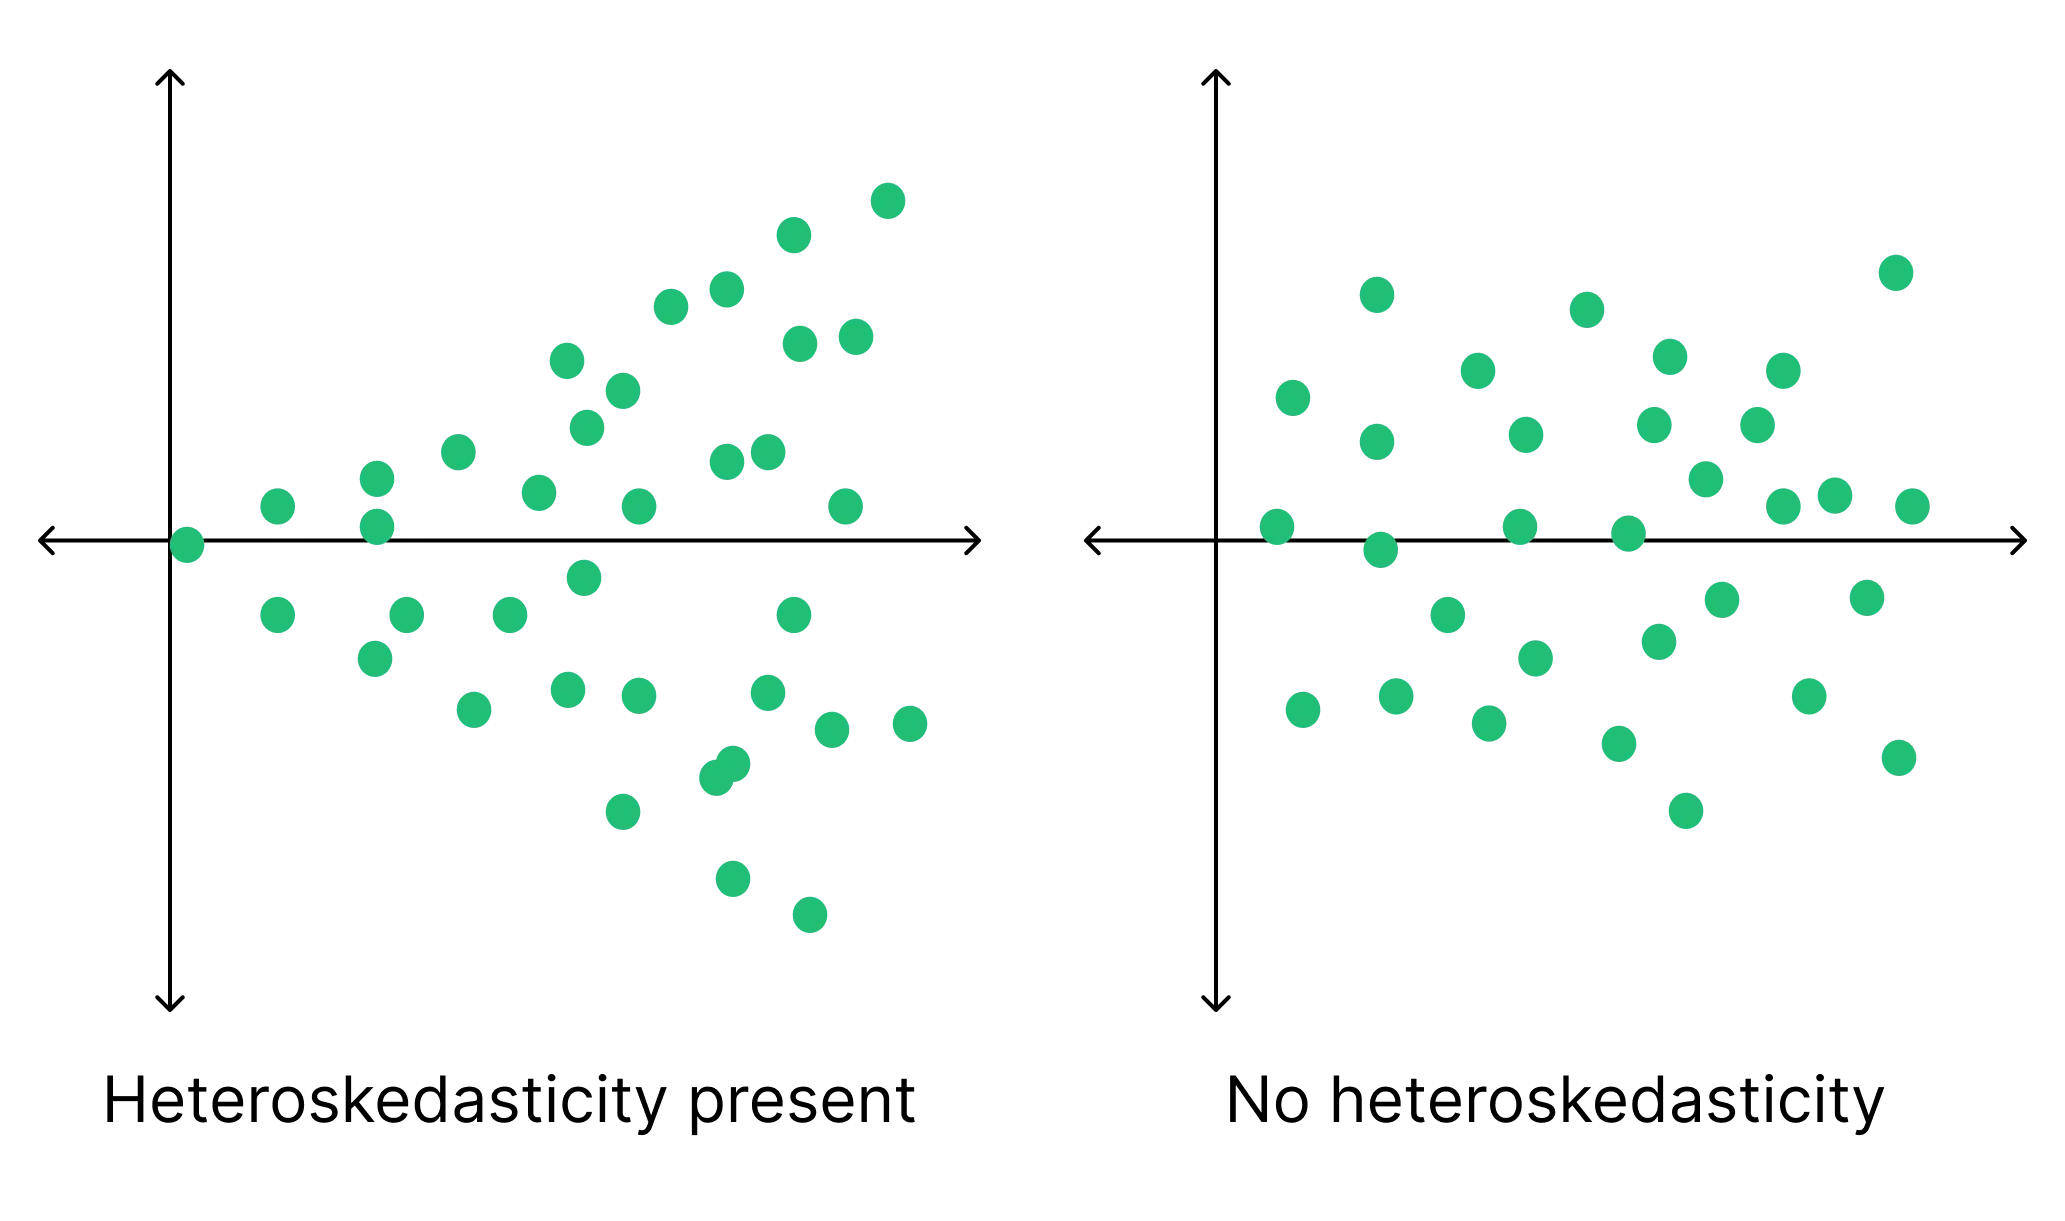

### Normal distribution of the error aka the resiudals

###############################################################################
Checking Normality


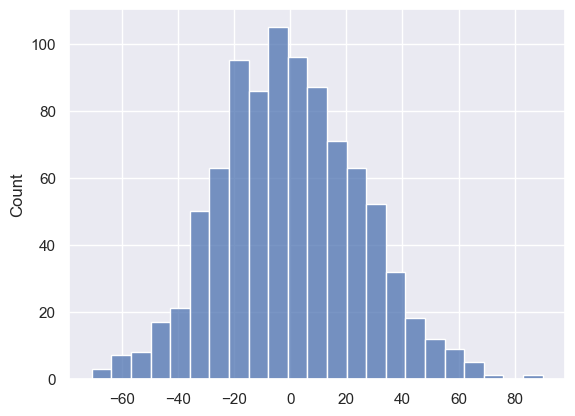

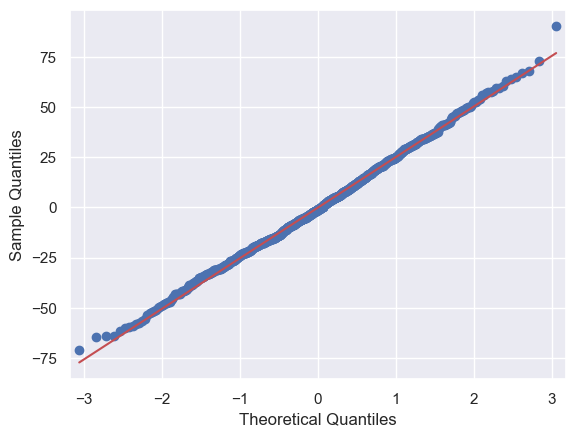

###############################################################################


In [40]:
from statsmodels.api import qqplot


print('#'*79)
print('Checking Normality')
# predictions
y_pred = model_runs_scored.predict(X)

# the truth - the prediction
residuals =  y.values - y_pred.values 

# histogram
sns.histplot(residuals)
plt.show()


# qq plot
qqplot(residuals, line='q');
plt.show()
print('#'*79)





# Checking for Multicollinearity 

### Member this summary report and why i asked if it looked strange?


In [41]:
independent_variables = ['OBP', 'SLG', 'BA']
dependent_variable = 'RS'

X = df[independent_variables]

y = df[dependent_variable]

X = sm.add_constant(X)

model_runs_scored = sm.OLS(y, X).fit()
print(model_runs_scored.summary())

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3989.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:23:00   Log-Likelihood:                -4170.2
No. Observations:                 902   AIC:                             8348.
Df Residuals:                     898   BIC:                             8368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -788.4570     19.697    -40.029      0.0

# This looks strange because batting average shouldn't be NEGATIVELY affecting Runs scored... 
## Why is this happening.  

<div>
<img src=https://i.imgflip.com/80a3lx.jpg width="500">
</div>

# Checking mulitcollinearity

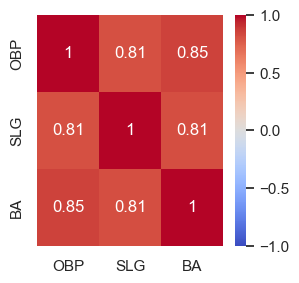

In [44]:
plt.figure(figsize = (3,3))

ax = sns.heatmap( df[independent_variables].corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm',
            vmin=-1, vmax=1);
plt.show()

In [45]:
# https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df = pd.DataFrame(columns=X.columns, data=[vif])
print('#'*79)
print('Variance Inflaction Factors')
print(vif_df)
print('#'*79)


###############################################################################
Variance Inflaction Factors
        const       OBP       SLG        BA
0  573.891443  4.271126  3.426472  4.433501
###############################################################################


# DONT DO THIS BELOW IN JUPYTER NOTEBOOKS

In [46]:
%matplotlib inline


def check_linearity(df, independent_variables, dependent_variable):
    for col in independent_variables:
        sns.jointplot(x=col, y=dependent_variable, data=df, kind="reg");


##########################################################################
def check_normality(model, X, y):
    print('#'*79)
    print('Checking Normality')
    # predictions
    y_pred = model.predict(X)

    # the truth - the prediction
    residuals =  y.values - y_pred.values 

    # histogram
    sns.histplot(residuals)
    plt.show()


    # qq plot
    qqplot(residuals, line='q');
    plt.show()
    print('#'*79)

    

##########################################################################
def plot_homo(model):
    plt.scatter(model_runs_scored.fittedvalues, model_runs_scored.resid, alpha=0.5)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.axhline(y = 0, color = 'r')
    plt.show()


##########################################################################    
def plot_correlation(df, independent_variables):
    plt.figure(figsize = (3,3))

    ax = sns.heatmap( df[independent_variables].corr(numeric_only=True), 
                annot=True, 
                cmap='coolwarm',
                vmin=-1, vmax=1);
    plt.show()
    

##########################################################################
def get_vif(X):
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df = pd.DataFrame(columns=X.columns, data=[vif])
    print('#'*79)
    print('Variance Inflaction Factors')
    print(vif_df)
    print('#'*79)
    return vif_df



##########################################################################
def build_and_validate_LR(df, independent_variables, dependent_variable):
    X = df[independent_variables]

    y = df[dependent_variable]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    print(model.summary())
    
    check_linearity(df, independent_variables, dependent_variable)
    
    plot_correlation(df, independent_variables)
    
    vif_df = get_vif(X)
    
    check_normality(model, X, y)

# Do This Instead:

### Introducting the CTP-LIBRARY

                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:33:57   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -804.6271     18.921    -42.526      0.0

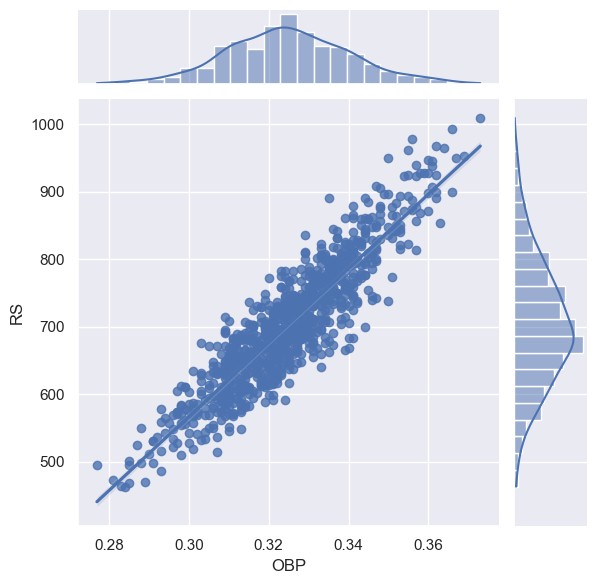

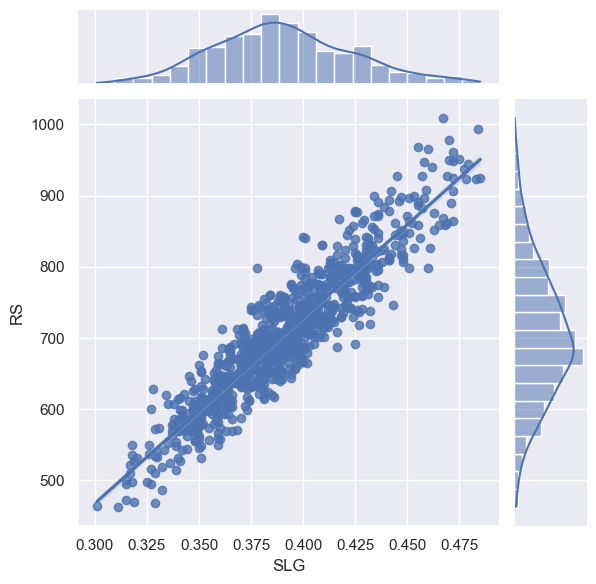

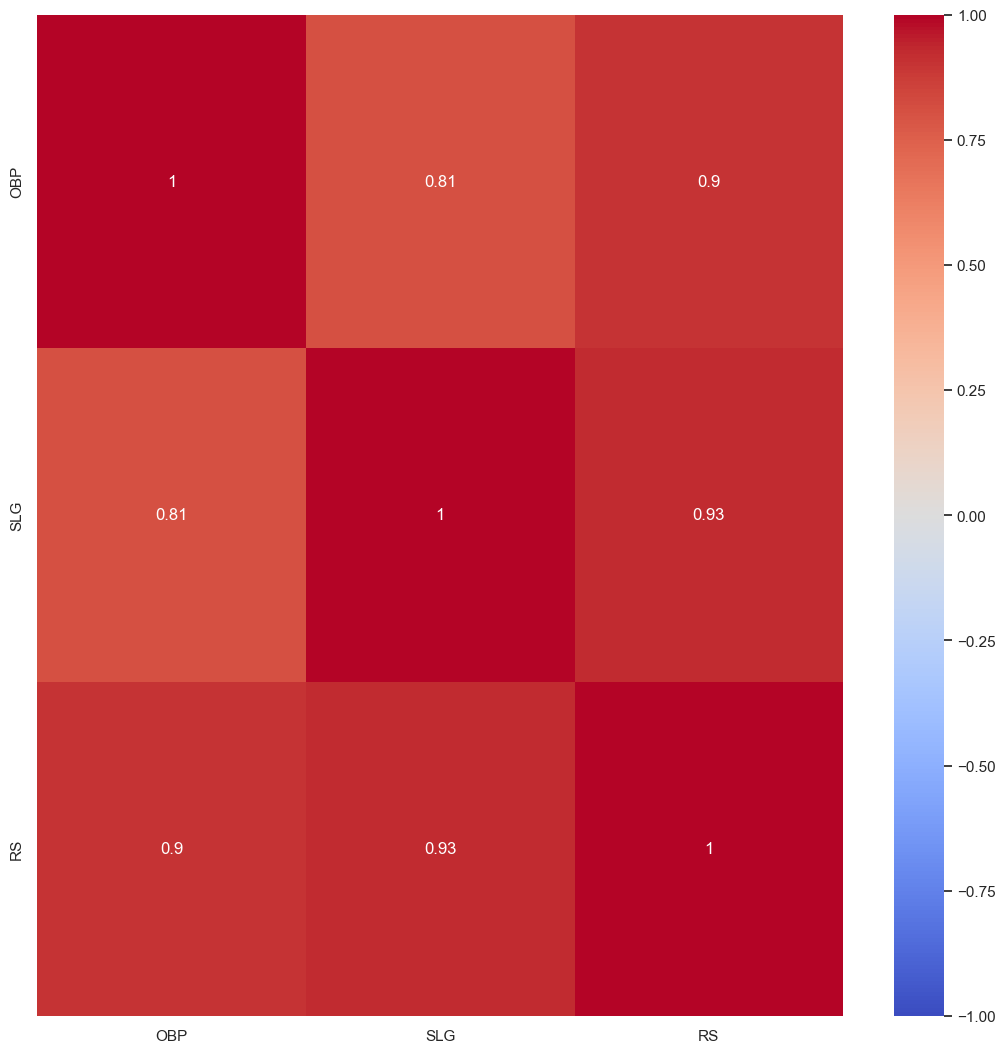

###############################################################################
Variance Inflaction Factors
        const       OBP       SLG
0  525.450097  2.856197  2.856197
###############################################################################
###############################################################################
Checking Normality


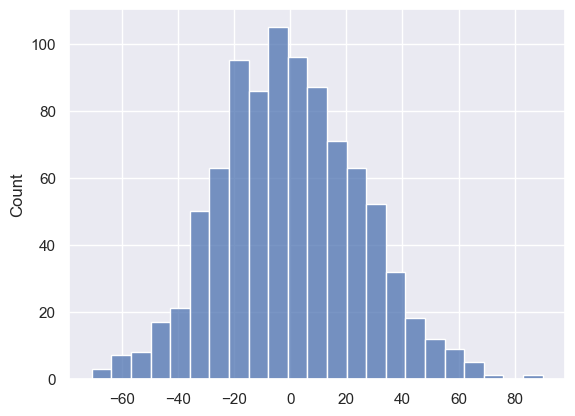

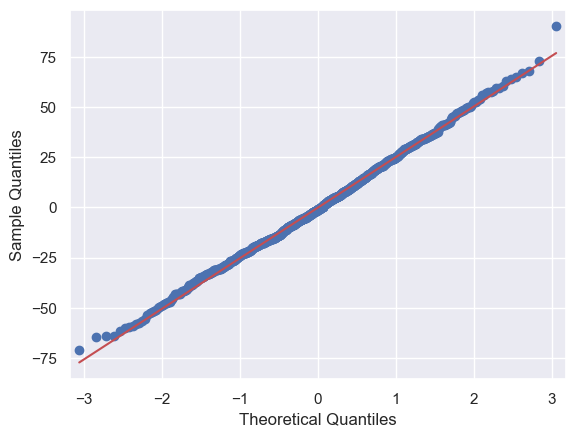

###############################################################################


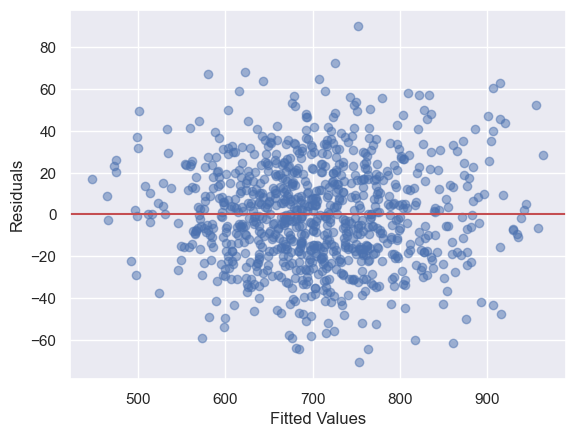

In [60]:
import CTPLIB as ctp

ivs = ['OBP', 'SLG']
dv = 'RS'

ctp_model = ctp.CTP_LinReg(df=df, independent_variables=ivs, dependent_variable=dv)
ctp_model.run_all()



                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:18:52   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -804.6271     18.921    -42.526      0.0

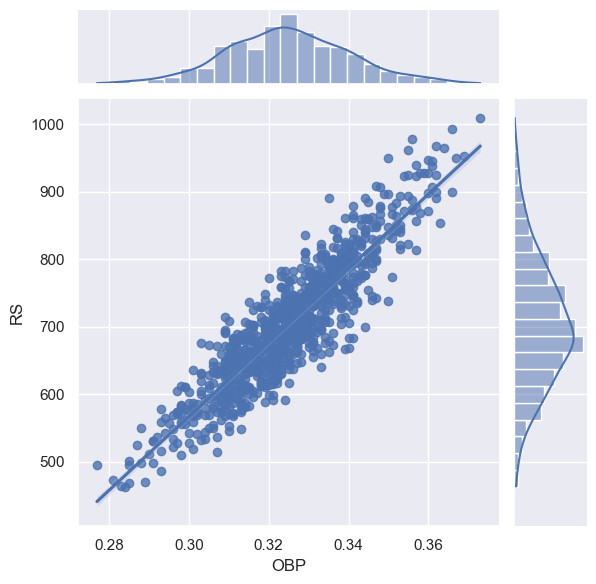

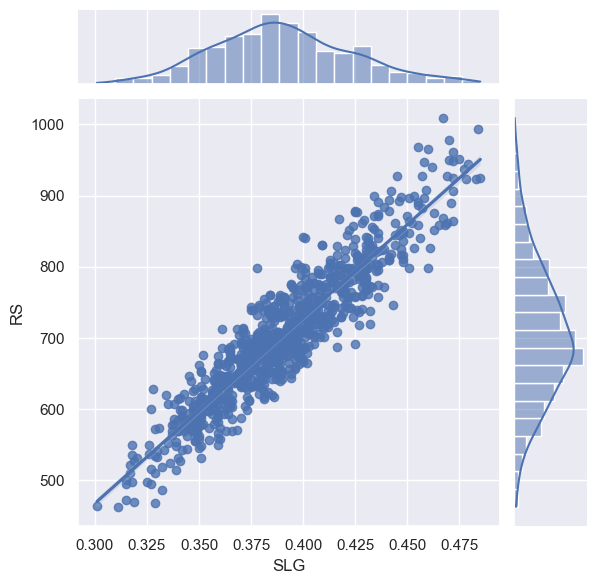

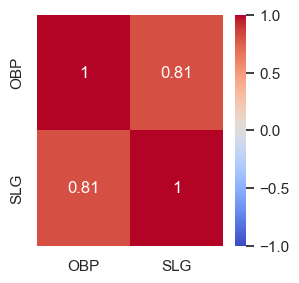

###############################################################################
Variance Inflaction Factors
        const       OBP       SLG
0  525.450097  2.856197  2.856197
###############################################################################
###############################################################################
Checking Normality


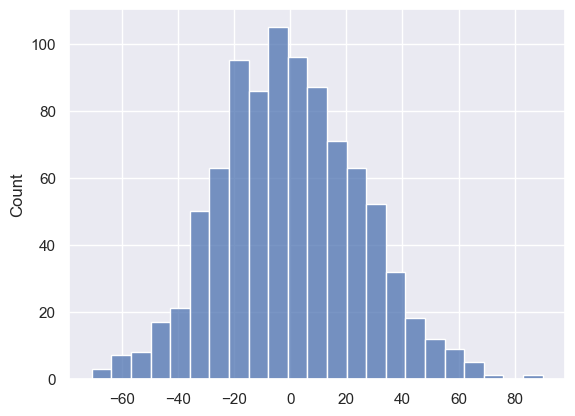

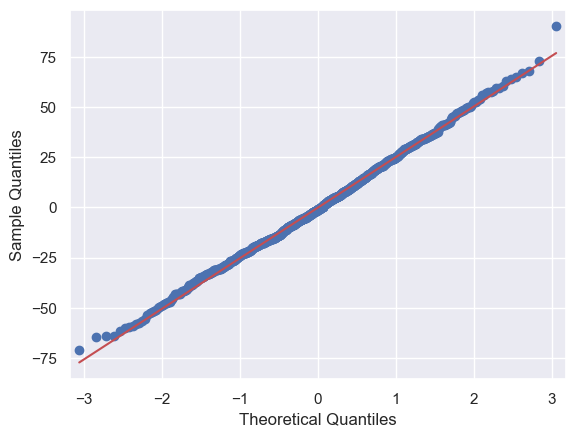

###############################################################################


In [99]:
independent_variables = ['OBP', 'SLG']
dependent_variable = 'RS'
build_and_validate_LR(df, independent_variables, dependent_variable)

# For the runs_allowed model

### What's this error?


In [62]:
ivs = ['OOBP', 'OSLG']
dv = 'RA'
ctp_RA = ctp.CTP_LinReg(df, ivs, dv)
ctp_RA.run_all()

MissingDataError: exog contains inf or nans

                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     425.8
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.16e-45
Time:                        09:35:50   Log-Likelihood:                -418.27
No. Observations:                  90   AIC:                             842.5
Df Residuals:                      87   BIC:                             850.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -837.3779     60.255    -13.897      0.0

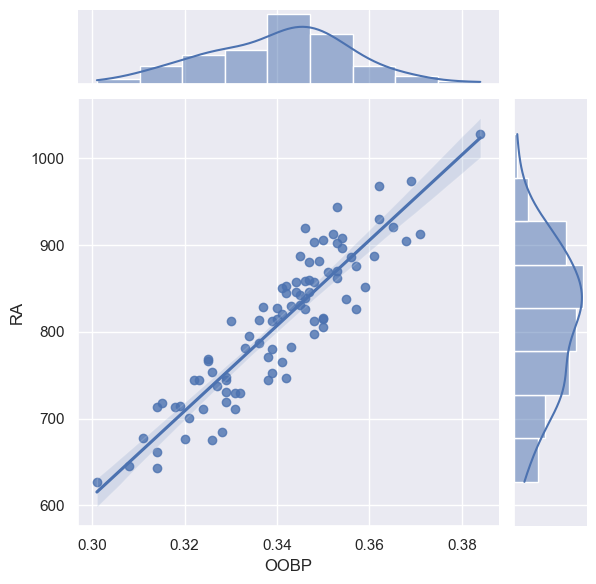

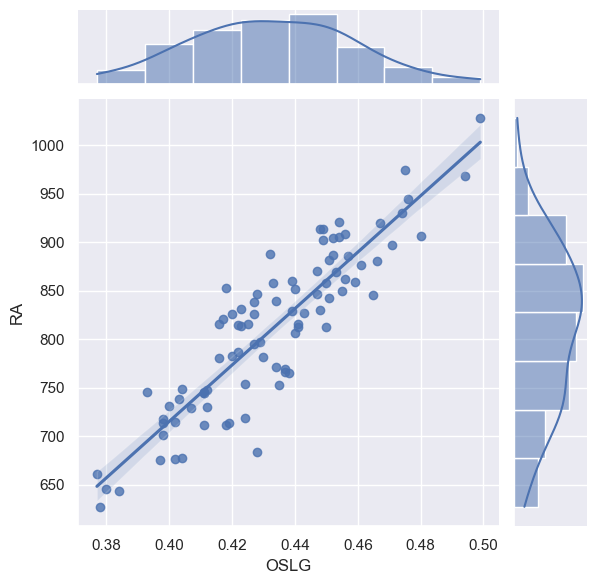

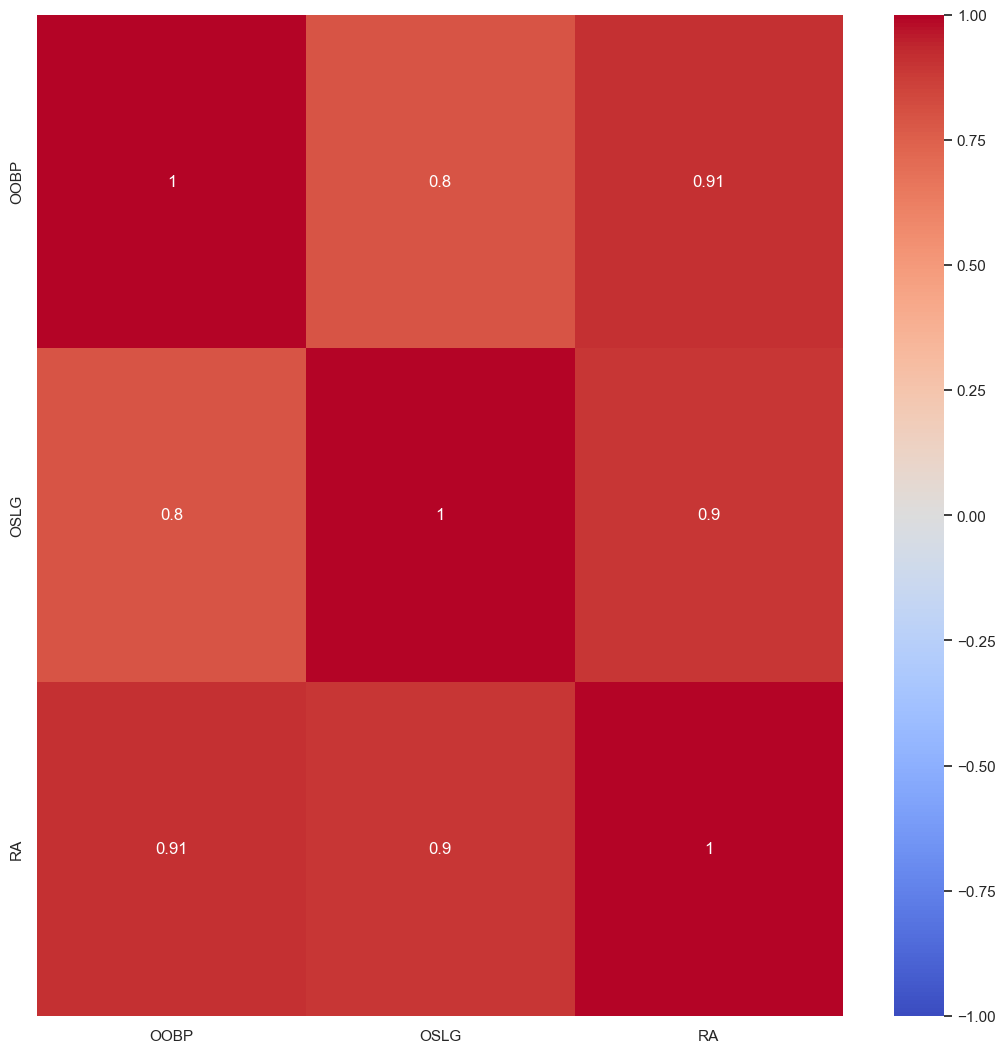

###############################################################################
Variance Inflaction Factors
        const      OOBP      OSLG
0  495.736774  2.735629  2.735629
###############################################################################
###############################################################################
Checking Normality


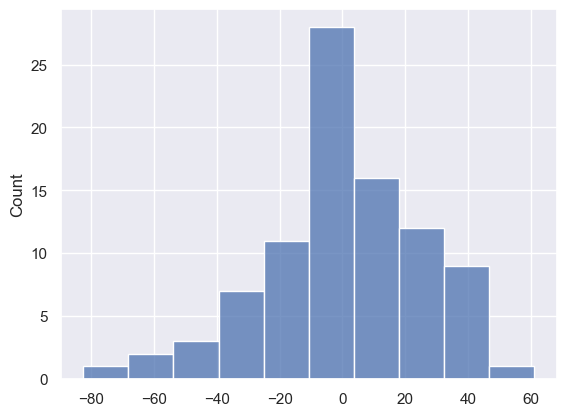

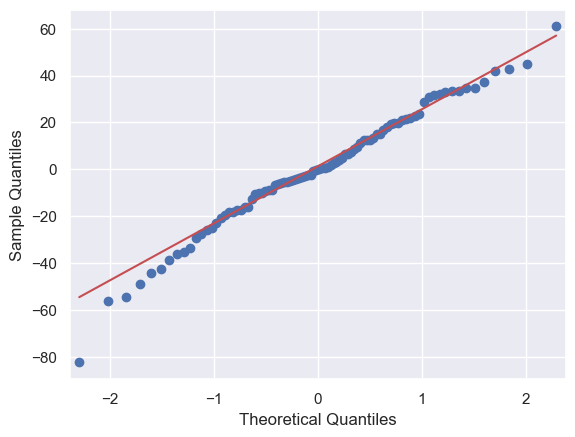

###############################################################################


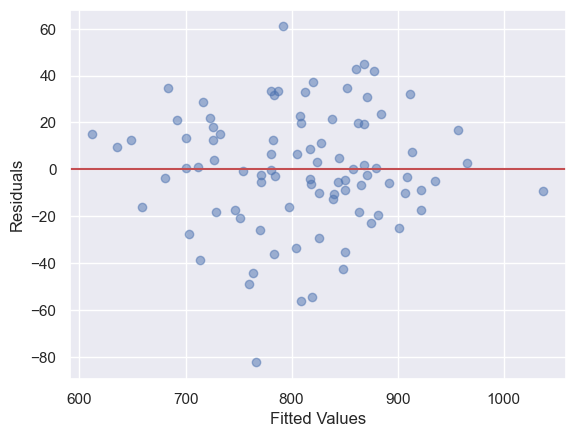

In [63]:
ivs = ['OOBP', 'OSLG']
dv = 'RA'

ctp_RA = ctp.CTP_LinReg(df_defense, ivs, dv)
ctp_RA.run_all()


# Lets just do this in SK-Learn to sanity check our results

In [64]:
df = load_baseball_data()

X = df[['runs_diff']]
y = df['W']
print(y.mean())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr_wins = LinearRegression()

lr_wins.fit(X_train, y_train)

y_pred = lr_wins.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

mse_lr_wins = metrics.mean_squared_error(y_test, y_pred)

rmse_lr_wins = metrics.mean_squared_error(y_test, y_pred, squared=False)
np.sqrt(mse_lr_wins), rmse_lr_wins



80.88137472283813
R-Squared Score: 0.8887612652084025


(3.9866371045441045, 3.9866371045441045)

In [65]:
print(rmse_lr_wins)
print(model_wins_root_mean_squared_error)

3.9866371045441045
3.93471814099855


In [66]:
# Predicting Runs Scored
df = load_baseball_data()

## Runs Scored
X = df[['OBP', 'SLG']]
y = df['RS']
print(y.mean()) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr_runs_scored = LinearRegression()

lr_runs_scored.fit(X_train, y_train)

y_pred = lr_runs_scored.predict(X_test)


r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

metrics.mean_squared_error(y_test, y_pred, squared=False)



703.8093126385809
R-Squared Score: 0.9327255817652913


24.140977525469175

In [67]:
# Predicting Runs Allowed
df = load_baseball_data()

df_defense = df[['OOBP', 'OSLG', 'RA']].copy()
print(df_defense.isnull().sum())
df_defense = df_defense.dropna()
print(df_defense.shape)

X = df_defense[['OOBP', 'OSLG']]
y = df_defense['RA']
print(y.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_runs_allowed = LinearRegression()

lr_runs_allowed.fit(X_train, y_train)

y_pred = lr_runs_allowed.predict(X_test)

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

metrics.mean_squared_error(y_test, y_pred, squared=False)

OOBP    812
OSLG    812
RA        0
dtype: int64
(90, 3)
809.5666666666667
R-Squared Score: 0.9106733449899175


20.85195037283765